<a href="https://colab.research.google.com/github/Agrudi/Agrudi/blob/main/Copy_of_Deliverable_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas as pd

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import math
from PIL import Image
from pandas.plotting import scatter_matrix

#Load data and prepare dataframe

In [ ]:
# United States
csv = pd.read_csv("/content/USvideos.csv")
df = csv.copy()

with open('/content/US_category_id.json') as us_cat:
    us_cats = json.load(us_cat)

<ipython-input-25-6ef3f32a2d06>:2: DtypeWarning:

Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
vid_cat_us = []
cat_id_us = []

# category mapping
for item in us_cats['items']:
    vid_cat_us.append(item['snippet']['title'])
    cat_id_us.append(int(item['id']))
    category_id = item['id']

df.category_id = csv.category_id.map(dict(zip(cat_id_us, vid_cat_us)))
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [ ]:
df.category_id.isnull().sum() # no null value

0

#Data transform and prepare columns

In [ ]:
# all dates to DateTime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'].astype(str), infer_datetime_format = True)

# prepare columns
df['publish_date'] = df['publish_time'].dt.date
df['publish_day'] = df['publish_time'].dt.weekday
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_time'] = df['publish_time'].dt.time

#Data Cleaning

In [ ]:
df = df.drop_duplicates(keep = 'first')
df = df.dropna()

df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,0,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,0,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,6,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,0,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,People & Blogs,16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",2018-05-18,4,16
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018-05-18,4,13
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,2018-05-18,4,17
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,2018-05-17,3,17


#Explore our data

#Statistics

In [ ]:
df[['views','likes','dislikes']].mean()

views       2.370824e+06
likes       7.462234e+04
dislikes    3.508185e+03
dtype: float64

In [ ]:
df[['views','likes','dislikes']].median()

views       688423.0
likes        18351.5
dislikes       636.0
dtype: float64

In [ ]:
df[['views', 'likes']].corr()
df[['views', 'dislikes']].corr()
df[['views','likes','dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.848746,0.558112,0.655858
likes,0.848746,1.000000,0.514693,0.853417
dislikes,0.558112,0.514693,1.000000,0.623137
comment_count,0.655858,0.853417,0.623137,1.000000


In [ ]:
df[['views','likes','dislikes', 'comment_count']].std()

views            7.432121e+06
likes            2.297311e+05
dislikes         2.318773e+04
comment_count    3.433488e+04
dtype: float64

#views v.s. category

Text(0.5, 0, 'views')

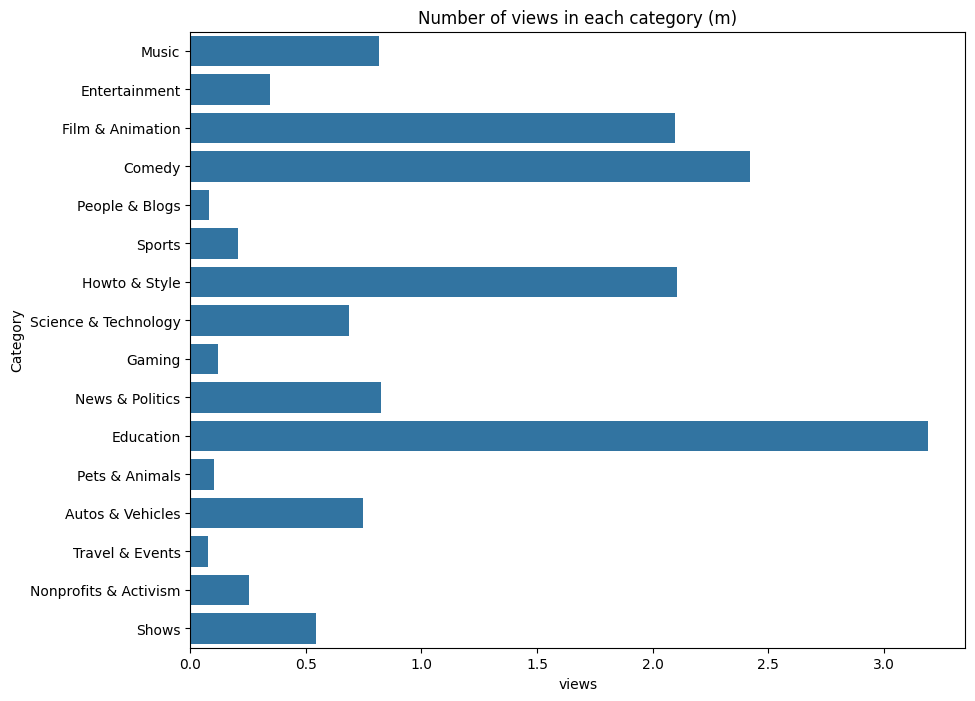

In [ ]:
df2 = df[['category_id', 'views']].groupby('category_id').aggregate(np.sum).reset_index()\
.sort_values(by='views', ascending=False)

df2.views = df.views/10**6
plt.figure(figsize=(10,8))
view_box = sns.barplot(x='views', y='category_id',data=df2, orient='h')
plt.title('Number of views in each category (m)')
plt.ylabel('Category')
plt.xlabel('views')

#Publish time analysis

In [ ]:
data = df['publish_day'].map(dict(zip(range(7),
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))).value_counts()

fig = go.Figure(data=[go.Bar(x=data.index.values, y=data, textposition='auto')])

fig.update_layout(title="Number of Videos Published per Weekday", yaxis=dict(title="Videos"))
fig.show()

#like/views ratio v.s. views

In [ ]:
#Load data, define hover text and bubble size, only look at videos with 10M views or above
data = df[['title', 'channel_title', 'category_id', 'views', 'publish_day',
          'publish_hour', 'likes', 'dislikes']].loc[df.views > 10**7].reset_index()
data.publish_day = data.publish_day.map(dict(zip(range(7),
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])))

def bubble_plt(target, plot_title, target_title, data):
    hover_text = []
    bubble_size = []
    for index, row in data.iterrows():
        hover_text.append(('Title: {title}<br>'+
                          'Category: {category_id}<br>'+
                          'Channel: {channel_title}<br>'+
                          'Views: {views}<br>'+
                          'Likes: {likes}<br>'+
                          'Dislikes: {dislikes}<br>'
                          ).format(title=row['title'],
                                  channel_title=row['channel_title'],
                                  category_id=row['category_id'],
                                  views = row['views'],
                                  likes = row['likes'],
                                  dislikes = row['dislikes']))
        bubble_size.append(row[target]/row['views'])
    data['text'] = hover_text
    data['size'] = bubble_size
    fig = go.Figure()

      #Dictionary with dataframes for each weekday
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday']
    wd_data = {wd:data.query("publish_day == '%s'"%wd)
              for wd in weekday}
    #Create Figure
    for key, values in wd_data.items():
        fig.add_trace(go.Scatter(
            x=values['views'], y=values[target]/values['views'],
            name=key, text=values['text'],
            marker_size=values['size'],
            ))

    sizeref = 2.*max(data['size'])/(1000)

    #Tune marker appearance and layout
    fig.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=sizeref, line_width=2))

    fig.update_layout(
        title=plot_title,
        xaxis=dict(
            title='Number of views in millions',
            gridcolor='white',
            type='log',
            gridwidth=2,
        ),
        yaxis=dict(
            title=target_title,
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        legend = {'itemsizing': 'constant'}
    )
    fig.show()

bubble_plt('likes',"like/view Ratio vs. Number of views", "Like/view Ratio", data)



In [ ]:
bubble_plt('dislikes',"dislike/view Ratio vs. Number of views", "Disike/view Ratio", data)

#Predict how many days to make your video trending

In [ ]:
new_data = df.loc[(df.comments_disabled) &
                 (~df.ratings_disabled)].copy()

new_data['day_to_trend'] = abs(np.subtract(new_data.trending_date.dt.date,new_data.publish_date)
                               .apply(lambda x: x.days))

#new_data['day_to_trend'] = abs(np.subtract(new_data.trending_date.dt.date,new_data.publish_date,dtype=np.float32)

left_vars = ['views','likes','dislikes','comment_count','publish_day','publish_hour','day_to_trend','title']

new_data = new_data[left_vars]
new_data.reset_index(inplace=True)
new_data

,index,views,likes,dislikes,comment_count,publish_day,publish_hour,day_to_trend,title
0,31,26000,119,69,0,0,17,8,Amazon Christmas Advert 2017 - Toys & Games
1,103,264793,3283,853,0,3,8,5,H&M Holiday 2017 starring Nicki Minaj – offici...
2,290,94229,217,177,0,0,17,9,Amazon Christmas Advert 2017 - Toys & Games
3,372,271685,3330,854,0,3,8,6,H&M Holiday 2017 starring Nicki Minaj – offici...
4,483,11769,127,13,0,1,17,2,Amazon CEO Jeff Bezos and brother Mark give a ...
...,...,...,...,...,...,...,...,...,...
492,40549,3238183,61841,3708,0,2,1,0,Nintendo @ E3 2018: Day 1
493,40624,8903674,79182,31697,0,0,4,9,iPhone X — Animoji: Taxi Driver — Apple
494,40631,4642895,53192,4312,0,6,21,10,And the WINNER of Britain’s Got Talent 2018 is...
495,40832,8916546,79282,31716,0,0,4,10,iPhone X — Animoji: Taxi Driver — Apple


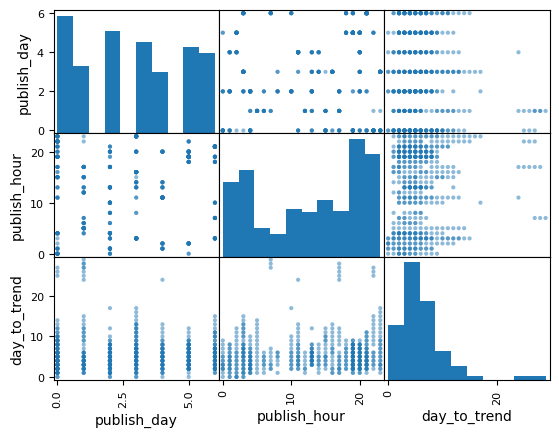

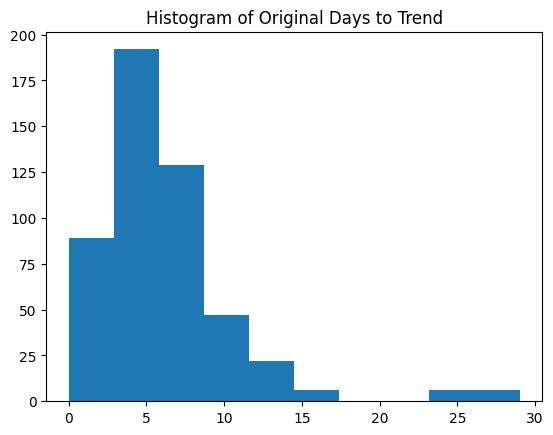

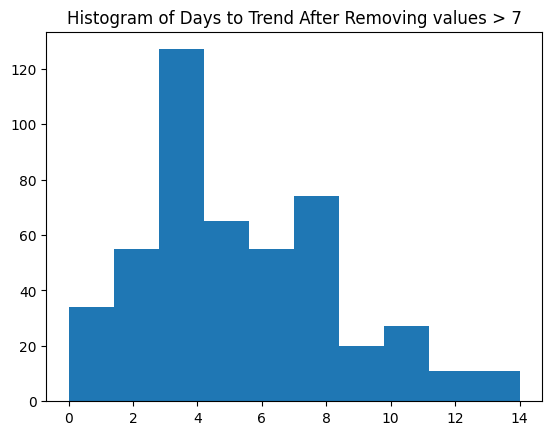

In [ ]:
scatter_matrix(new_data[['publish_day', 'publish_hour', 'day_to_trend']])
plt.show()
plt.hist(new_data['day_to_trend'])
plt.title("Histogram of Original Days to Trend")
plt.show()

new_data = new_data.loc[new_data.day_to_trend <= 14]
plt.hist(new_data['day_to_trend'])
plt.title("Histogram of Days to Trend After Removing values > 7")
plt.show()

#Random Forest Algorithm

In [ ]:
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
new_data.day_to_trend = new_data.day_to_trend <= 7


<ipython-input-19-4fb74b3cba86>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def rf_model(X, y, my_pg = None):
    #perform Grid-search
    if my_pg is None:
        #the followings are hyperparameters to optimize:max depth of a tree and number of trees in the forest
        my_pg={
            'max_depth': range(6,10),
            'n_estimators': range(155,170),
            }

    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid = my_pg,cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X,y)

    return grid_result.best_params_,grid_result.best_score_

In [ ]:
X = new_data[['views', 'likes', 'dislikes', 'publish_day', 'publish_hour']]
y = new_data['day_to_trend']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4,test_size=.3)

In [ ]:
print(rf_model(X_train,y_train))

({'max_depth': 9, 'n_estimators': 164}, 0.8985074626865671)


In [ ]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth = 9, n_estimators = 165, oob_score = True, warm_start = True)
rfc.fit(X_train, y_train)
#OOB Score(Out of Bag)
print(rfc.oob_score_) #0.8640226628895185
print(rfc.score(X_test,y_test)) # 0.9210526315789473
print(rfc.feature_importances_)
#print(pd.crosstab(pd.Series(y_train, name='Actual'), pd.Series(rfc.predict(X_train),name='predicted')))
print(pd.crosstab(pd.Series(y_test,name='Actual'), pd.Series(rfc.predict(X_test), name='predicted')))
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

0.8985074626865671
0.8611111111111112
[0.29547273 0.26354411 0.26505458 0.05788659 0.118042  ]
predicted  False  True 
Actual                 
False          1      4
True           8     33
              precision    recall  f1-score   support

       False       0.81      0.58      0.68        36
        True       0.87      0.95      0.91       108

    accuracy                           0.86       144
   macro avg       0.84      0.77      0.79       144
weighted avg       0.86      0.86      0.85       144



In [ ]:
!pip install scikit-plot
!python setup.py install

python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


TypeError: precision_recall_curve() takes 2 positional arguments but 3 were given

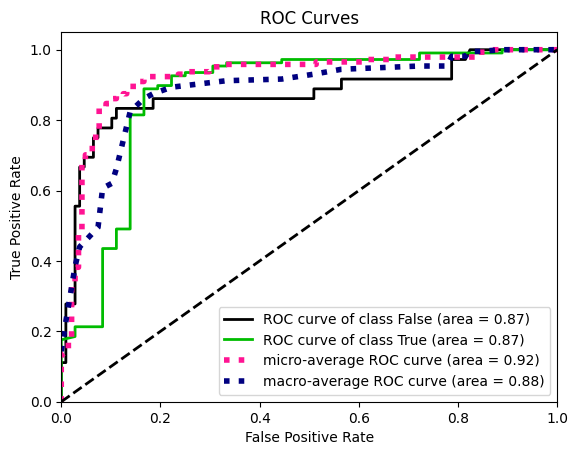

In [ ]:
import scikitplot as skplt
from sklearn.metrics import average_precision_score, precision_recall_curve
prob = rfc.predict_proba(X_test)
myplot = skplt.metrics.plot_roc(y_test, prob)
average_precision = average_precision_score(y_test, prob[:,1]) #prob[:,1] is the estimated probability of positive outcome
disp = precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:'
                  'AP={0:0.2f}'.format(average_precision))
score = metrics.f1_score(np.array(y_test),pred)
print('The f1 score for this model is {}'.format(score))


#XGBoost Algorithm

In [ ]:
from xgboost import XGBClassifier
parameters = [{'n_estimators':range(100,150,1)},
             {'learning_rate':np.arange(0.01,1.0,0.01)}]
gbm = XGBClassifier(subsample=0.8, random_state=10)
grid_search = GridSearchCV(estimator = gbm, param_grid = parameters, scoring='accuracy', cv=4, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

#grid_search.cv_results_
#grid_search.best_params_, grid_search.best_score_
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.42000000000000004,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb

In [ ]:
gbm = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                   importance_type='gain', interaction_contraints=None,
                   learning_rate=0.24, max_delta_step=0, max_depth=6,
                   max_features='sqrt', min_child_weight=1, missing=0,
                   monotone_constraints=None, n_estimators=100, n_jobs=0,
                   num_parallel_tree=1, objective='binary:logistic',random_state=10,
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                   tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print(classification_report(y_test, y_pred))

Predicted  0   1
Actual          
False      1   4
True       9  32
              precision    recall  f1-score   support

       False       0.85      0.61      0.71        36
        True       0.88      0.96      0.92       108

    accuracy                           0.88       144
   macro avg       0.86      0.79      0.82       144
weighted avg       0.87      0.88      0.87       144



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[22:32:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.


